In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
configs = []
runs = []
base = 'samples_analysis/camel-2d/'
# config_files = ['camel_hmc_stepsize-mass_config.json',
#                 'camel_hmc_stepsize-steps_config.json',
#                 'camel_hmc_steps+mass_config.json']
config_files = ['hmc_stepsize_config-1.json',
                'hmc_stepsize_config-2.json',
                'hmc_stepsize_config-3.json']

for config_name in config_files:
    with open(base + config_name) as inf:
        configs.extend(json.load(inf))
for config in configs:
    with open(base + config['name'] + '.json') as inf:
        print(config['name'])
        runs.append(json.load(inf))
        
for run in runs:
    try:
        run['params']['mass'] = round(1 / run['params']['mass'], 3)
    except AttributeError:
        pass

hmc-stepsize-m1.1-s5
hmc-stepsize-m1.1-s10
hmc-stepsize-m1.1-s15
hmc-stepsize-m1.1-s50
hmc-stepsize-m.7-s5
hmc-stepsize-m.7-s10
hmc-stepsize-m.7-s15
hmc-stepsize-m.7-s50
hmc-stepsize-m.5-s5
hmc-stepsize-m.5-s10
hmc-stepsize-m.5-s15
hmc-stepsize-m.5-s50
hmc-stepsize-m.3-s5
hmc-stepsize-m.3-s10
hmc-stepsize-m.3-s15
hmc-stepsize-m.3-s50
hmc-stepsize-m.1-s5
hmc-stepsize-m.1-s10
hmc-stepsize-m.1-s15
hmc-stepsize-m.1-s50
hmc-stepsize-m.01-s5
hmc-stepsize-m.01-s10
hmc-stepsize-m.01-s15
hmc-stepsize-m.01-s50


In [86]:
def plot_all(vary, runs, cols=3, chi2_bound=100):
    varying = ['step_size', 'steps', 'mass']
    varying.remove(vary)
    
    runs = [run for run in runs if vary in run['params_vary']]
    print('plotting', len(runs))
    plot_count = len(runs)
    rows = int(np.ceil(plot_count / cols))
    plt.suptitle('Variation of ' + vary, fontsize=14)
    index = 1
    
    ess_max = 1
    chi2_max = 1
    for run in runs:
        chi2_max = max(np.log(np.max(run['chi2'])), chi2_max)
        try:
            ess_max = max(np.max(np.min(np.array(run['eff_sample_size']), axis=1)), ess_max)
        except:
            plot_ess = False
    chi2_max = min(chi2_max, chi2_bound)
    plot_ess = True
    
    for run in runs:
        running_var = run['params_vary'][vary]
        ax = plt.subplot(rows, cols, index)
        index += 1
        ax.set_title(', '.join(param + ' = %s' % run['params'][param] for param in varying))
    
        # acceptance rate
        ax.plot(running_var, run['accept_rate'], 'x-', label='accept')
        
        if plot_ess:
            try:
                ess = np.min(np.array(run['eff_sample_size']), axis=1)
                ax.plot(running_var, ess/ess_max, 'x-', label=r'ess$[\times %d]$'%ess_max)
            except:
                plot_ess = False
            
        # chi^2
        chi2 = np.log(np.array(run['chi2']))
        ax.plot(running_var, chi2/chi2_max, '.-', label=r'$\ln\chi^2 [\times %.f]$'%chi2_max)
        
        # chi^2
        chi2_p = np.array(run['chi2_p'])
        ax.plot(running_var, chi2_p, '.-', label=r'$p$')
        
        plt.legend(bbox_to_anchor=(0., -0.21, 1., .102), loc=3,
           ncol=3 + plot_ess, mode="expand", borderaxespad=0.)
        
        ax.grid(b=True, which='major')
        ax.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.35, top=.95, bottom=.2)

    
def plot_all_nolog(vary, runs, cols=3, chi2_bound=100):
    varying = ['step_size', 'steps', 'mass']
    varying.remove(vary)
    
    runs = [run for run in runs if vary in run['params_vary']]
    print('plotting', len(runs))
    plot_count = len(runs)
    rows = int(np.ceil(plot_count / cols))
    plt.suptitle('Variation of ' + vary, fontsize=14)
    index = 1
    
    ess_max = 1
    chi2_max = 1
    for run in runs:
        chi2_max = max(np.max(run['chi2']), chi2_max)
        try:
            ess_max = max(np.max(np.min(np.array(run['eff_sample_size']), axis=1)), ess_max)
        except:
            plot_ess = False
    chi2_max = min(chi2_max, chi2_bound)
    plot_ess = True
    
    for run in runs:
        running_var = run['params_vary'][vary]
        ax = plt.subplot(rows, cols, index)
        index += 1
        ax.set_title(', '.join(param + ' = %s' % run['params'][param] for param in varying))
    
        # acceptance rate
        ax.plot(running_var, run['accept_rate'], 'x-', label='accept')
        
        if plot_ess:
            try:
                ess = np.min(np.array(run['eff_sample_size']), axis=1)
                ax.plot(running_var, ess/ess_max, 'x-', label=r'ess$[\times %d]$'%ess_max)
            except:
                plot_ess = False
            
        # chi^2
        chi2 = np.array(run['chi2'])
        ax.plot(running_var, chi2/chi2_max, '.-', label=r'$\chi^2 [\times %.f]$'%chi2_max)
        
        # chi^2
        chi2_p = np.array(run['chi2_p'])
        ax.plot(running_var, chi2_p, '.-', label=r'$p$')
        
        plt.legend(bbox_to_anchor=(0., -0.21, 1., .102), loc=3,
           ncol=3 + plot_ess, mode="expand", borderaxespad=0.)
        
        ax.grid(b=True, which='major')
        ax.set_ylim(0, 1.1)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.35, top=.95, bottom=.2)

def plot_av(vary, run, chi2_bound=100):
    varying = ['step_size', 'steps', 'mass']
    try:
        varying.remove(vary)
    except:
        pass
    ess_max = 1
    chi2_max = 1
    chi2_max = max(np.max(run['chi2']), chi2_max)
    plot_ess = True
    try:
        ess_max = max(np.max(np.min(np.array(run['eff_sample_size']), axis=1)), ess_max)
    except:
        plot_ess = False
    chi2_max = min(chi2_max, chi2_bound)
    
    running_var = run['params_vary'][vary]
    ax = plt.gca()
    ax.set_title(', '.join(param + ' = %s' % run['params'][param] for param in varying))

    # acceptance rate
    ax.plot(running_var, run['accept_rate'], 'x-', label='accept')

    try:
        ess = np.min(np.array(run['eff_sample_size']), axis=1)
        ess_var = np.array(run['eff_sample_size_var'])
#         plt.fill_between(running_var, (ess-ess_var)/ess_max, (ess+ess_var)/ess_max)
        ax.plot(running_var, ess/ess_max, 'x-', label=r'ess$[\times %d]$'%ess_max)
#         ax.errorbar(running_var, ess/ess_max, yerr=ess_var/ess_max, fmt='x-', label=r'ess$[\times %d]$'%ess_max)
    except Exception as e:
        print(e)
        plot_ess = False

    # chi^2
    chi2 = np.array(run['chi2'])
#     chi2_var = np.array(run['chi2_var'])
#     ax.errorbar(running_var, chi2/chi2_max, fmt='.-', yerr=chi2_var/chi2_max, label=r'$\ln\chi^2 [\times %.f]$'%chi2_max)
    ax.plot(running_var, chi2/chi2_max, '.-', label=r'$\chi^2 [\times %.f]$'%chi2_max)
#     plt.fill_between(running_var, (chi2-chi2_var)/chi2_max, (chi2+chi2_var)/chi2_max)

    # chi^2
    chi2_p = np.array(run['chi2_p'])
    chi2_p_var = np.array(run['chi2_p_var'])
    ax.errorbar(running_var, chi2_p, yerr=chi2_p_var, fmt='.-', label=r'$p$')

    plt.legend(bbox_to_anchor=(0., -0.21, 1., .102), loc=3,
       ncol=3 + plot_ess, mode="expand", borderaxespad=0.)

    ax.grid(b=True, which='major')
    ax.set_ylim(0, 1.1)

In [22]:
plt.figure(figsize=(16, 25))
plot_all('steps', runs, 3, 20)
plt.savefig('camel-2d-steps.svg')
plt.show()

plotting 0


plotting 1


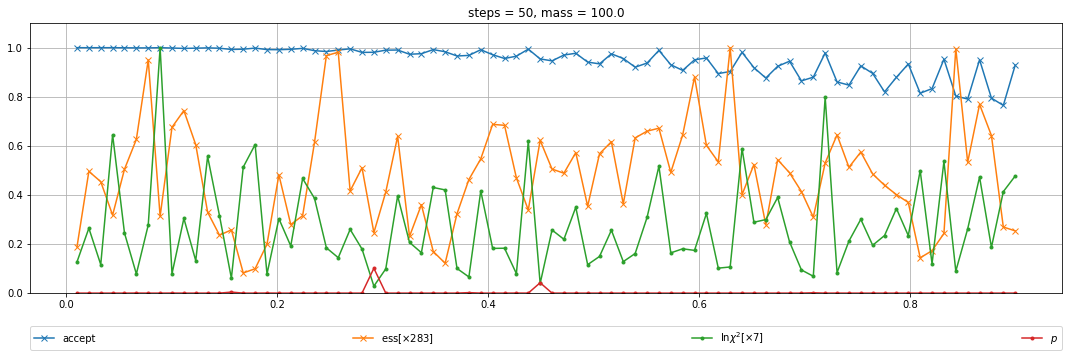

In [48]:
### Camel stepsize
with open('samples_analysis/camel-manual/hmc-stepsize-m100-s50.json', 'r') as inf:
    camel_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))
plot_all('step_size', [camel_stepsize], 1)
plt.suptitle('')
plt.savefig('manual-camel-stepsize.svg')
plt.show()

plotting 1


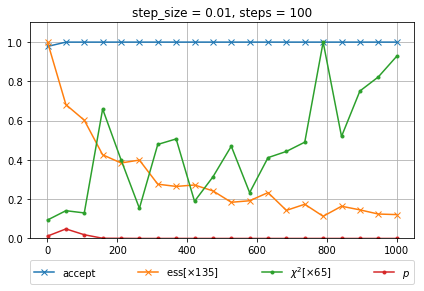

In [60]:
## camel mass explore av(10)

with open('samples_analysis/camel-manual/hmc-mass-s100-sz.01.json', 'r') as inf:
    banana_mass = json.load(inf)
    
plot_all_nolog('mass', [banana_mass], 1)
plt.suptitle('')
plt.savefig('manual-camel-mass.svg')
plt.show()

plotting 1


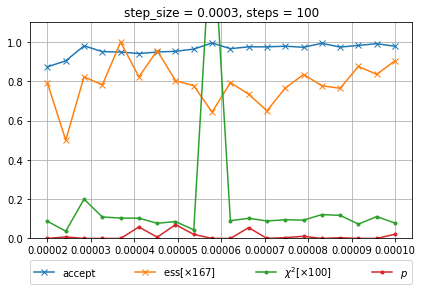

In [59]:
## camel mass explore av(10)

with open('samples_analysis/camel-manual/hmc-mass-s100-sz.0003.json', 'r') as inf:
    banana_mass = json.load(inf)
    
plot_all_nolog('mass', [banana_mass], 1, 100)
plt.suptitle('')
plt.savefig('manual-camel-mass-1.svg')
plt.show()

plotting 1


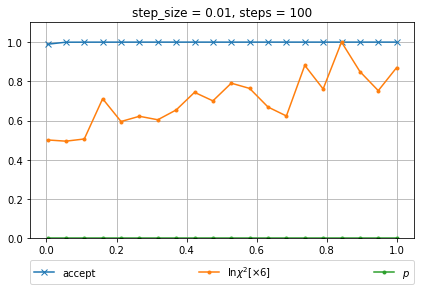

In [45]:
## banana mass explore av(10)

with open('samples_analysis/banana-manual/hmc-mass-s100-sz.01.json', 'r') as inf:
    banana_mass = json.load(inf)
    
plot_all('mass', [banana_mass], 1)
plt.suptitle('')
plt.savefig('manual-banana-mass.svg')
plt.show()

plotting 1


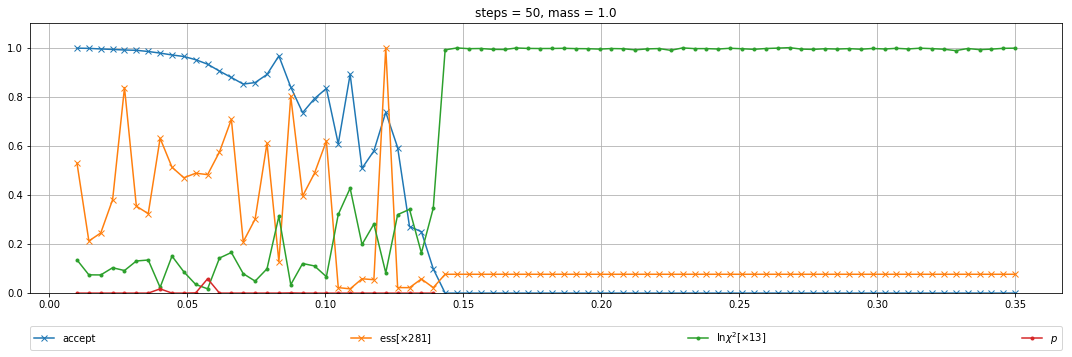

In [5]:
## banana stepsize explore av(1)

with open('samples_analysis/banana-manual/hmc-stepsize-m100-s50.json', 'r') as inf:
    banana_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_all('step_size', [banana_stepsize], 1)
plt.suptitle('')
plt.savefig('manual-banana-stepsize.svg')
plt.show()

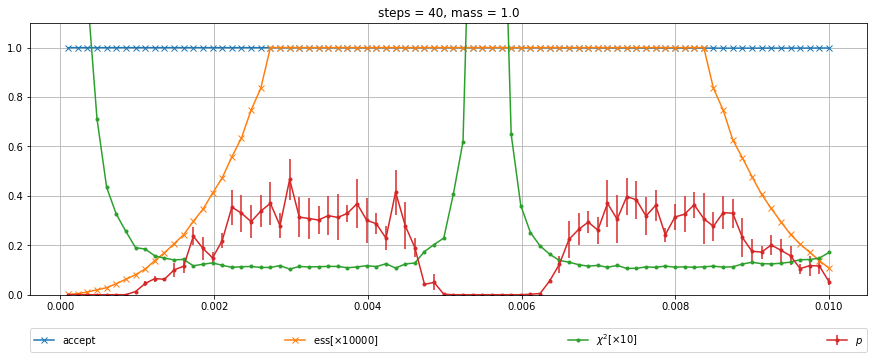

In [75]:
## gauss stepsize explore av(20)

with open('samples_analysis/gauss/hmc-stepsize.json', 'r') as inf:
    gauss_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_av('step_size', gauss_stepsize, 10)
plt.suptitle('')
plt.savefig('gauss-stepsize.svg')
plt.show()

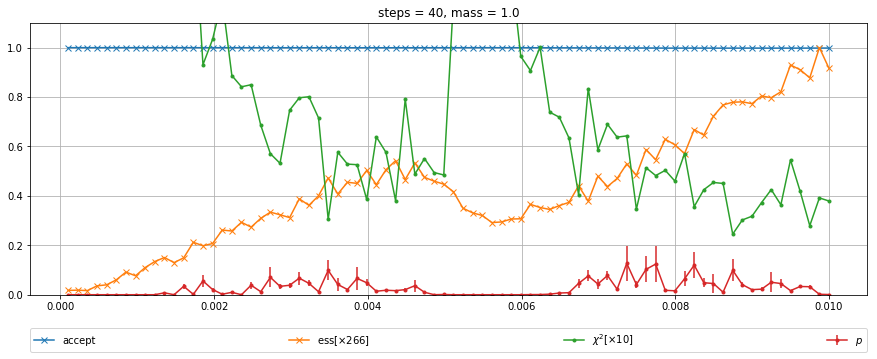

In [76]:
## gauss stepsize explore av(20)

with open('samples_analysis/gauss/camel-stepsize.json', 'r') as inf:
    gauss_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_av('step_size', gauss_stepsize, 10)
plt.suptitle('')
plt.savefig('gauss-stepsize.svg')
plt.show()

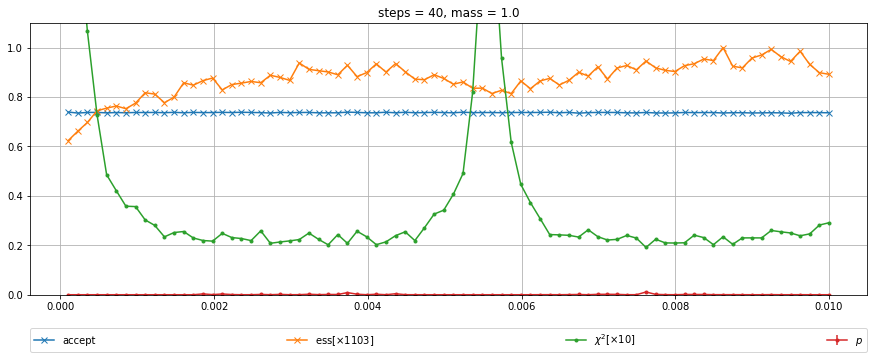

In [80]:
## mc3 .7 stepsize explore av(20)

with open('samples_analysis/gauss/mc3-stepsize-b.3.json', 'r') as inf:
    gauss_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_av('step_size', gauss_stepsize, 10)
plt.suptitle('')
plt.savefig('gauss-stepsize.svg')
plt.show()

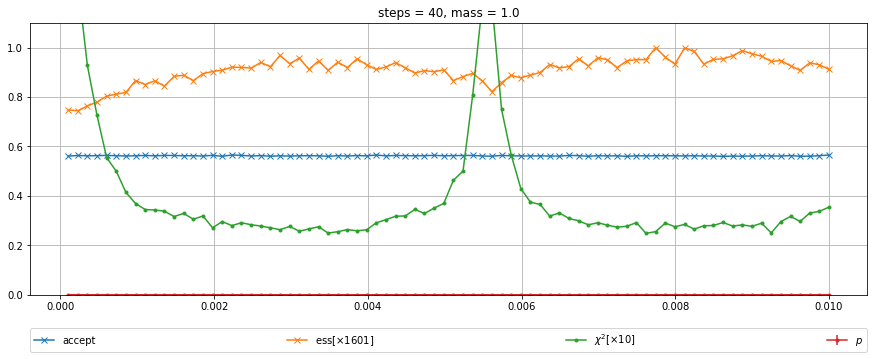

In [81]:
## mc3 .7 stepsize explore av(20)

with open('samples_analysis/gauss/mc3-stepsize-b.5.json', 'r') as inf:
    gauss_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_av('step_size', gauss_stepsize, 10)
plt.suptitle('')
plt.savefig('gauss-stepsize.svg')
plt.show()

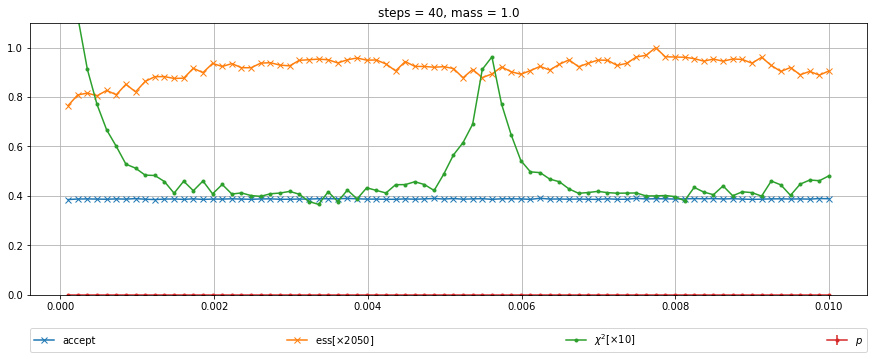

In [77]:
## mc3 .7 stepsize explore av(20)

with open('samples_analysis/gauss/mc3-stepsize-b.7.json', 'r') as inf:
    gauss_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_av('step_size', gauss_stepsize, 10)
plt.suptitle('')
plt.savefig('gauss-stepsize.svg')
plt.show()

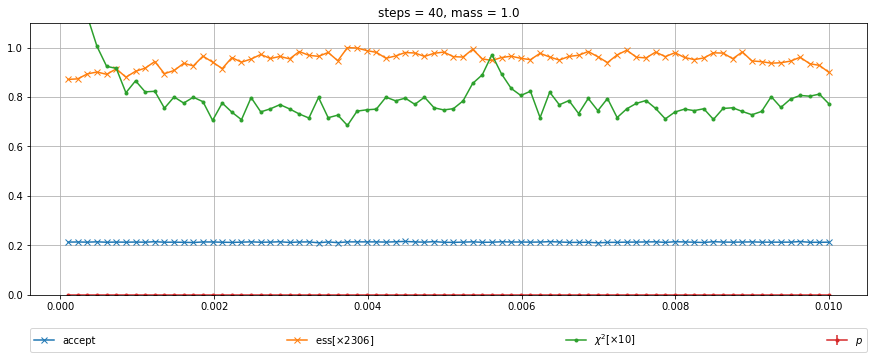

In [79]:
## banana stepsize explore av(1)

with open('samples_analysis/gauss/mc3-stepsize-b.9.json', 'r') as inf:
    gauss_stepsize = json.load(inf)

plt.figure(figsize=(15, 5))    
plot_av('step_size', gauss_stepsize, 10)
plt.suptitle('')
plt.savefig('gauss-stepsize.svg')
plt.show()

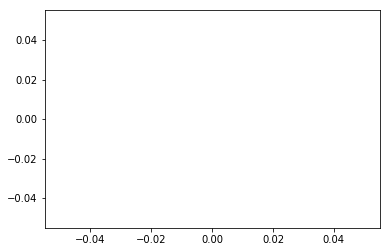

In [99]:
with open('samples_analysis/gauss/nuts-nadapt-run-1.json', 'r') as inf:
    nadapt = json.load(inf)
plt.plot( nadapt['chi2'])

In [100]:
nadapt['params']

KeyError: 'params'